In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mdsatria/datamining/master/dataset/text_sample.csv')

In [3]:
df

,doc,konten
0,doc_1,Saya suka hari sabtu
1,doc_2,Belajar data mining di hari sabtu
2,doc_3,Saya suka belajar Data Mining


In [4]:
df['konten']

0                 Saya suka hari sabtu
1    Belajar data mining di hari sabtu
2        Saya suka belajar Data Mining
Name: konten, dtype: object

In [5]:
corpus = df['konten'].str.lower().values
corpus

array(['saya suka hari sabtu', 'belajar data mining di hari sabtu',
       'saya suka belajar data mining'], dtype=object)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
vectorizer = TfidfVectorizer()

In [8]:
x = vectorizer.fit_transform(corpus)

In [9]:
for i in corpus:
    print(i)

saya suka hari sabtu
belajar data mining di hari sabtu
saya suka belajar data mining


In [10]:
vectorizer.get_feature_names()

['belajar', 'data', 'di', 'hari', 'mining', 'sabtu', 'saya', 'suka']

In [11]:
fitur = x.toarray()
fitur

array([[0.        , 0.        , 0.        , 0.5       , 0.        ,
        0.5       , 0.5       , 0.5       ],
       [0.38550292, 0.38550292, 0.50689001, 0.38550292, 0.38550292,
        0.38550292, 0.        , 0.        ],
       [0.4472136 , 0.4472136 , 0.        , 0.        , 0.4472136 ,
        0.        , 0.4472136 , 0.4472136 ]])

In [12]:
fitur.shape

(3, 8)

In [13]:
fitur[0, :]

array([0. , 0. , 0. , 0.5, 0. , 0.5, 0.5, 0.5])

In [14]:
def cos_sim(a, b):
    return np.dot(a,b) / (np.linalg.norm(a)) * (np.linalg.norm(b))

In [15]:
cos_sim(fitur[0, :], fitur[1, :])

0.38550292161010064

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
matrix_similarity = cosine_similarity(fitur)
matrix_similarity 

array([[1.        , 0.38550292, 0.4472136 ],
       [0.38550292, 1.        , 0.51720644],
       [0.4472136 , 0.51720644, 1.        ]])

In [18]:
import seaborn as sns

<AxesSubplot:>

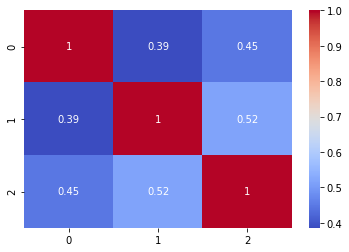

In [19]:
sns.heatmap(matrix_similarity, annot=True, cmap='coolwarm')